## Skin Cancer Detection 
By Effy Fang, Ying Huang, Kai Li

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from PIL import Image

In [4]:
folder_benign_train = 'Data/train/benign'
folder_malignant_train = 'Data/train/malignant'

folder_benign_test = 'Data/test/benign'
folder_malignant_test = 'Data/test/malignant'

In [5]:
#load train file
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

In [6]:
#create labels for train
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])
#for test
y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

In [7]:
#Merge data
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

#shuffle
np.random.seed(0)
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

np.random.seed(0)
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
y_test = y_test[s]

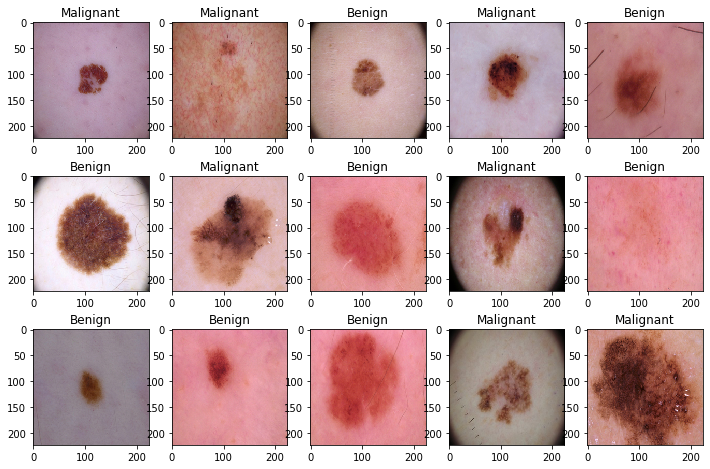

In [8]:
# Display first 15 images of moles, and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [9]:
X_train[0].shape

(224, 224, 3)

In [10]:
#normalize
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train_reshaped = X_train.reshape((X_train.shape[0],-1))

In [12]:
X_train_reshaped.shape

(2637, 150528)

In [15]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(copy=True).fit(X_train_reshaped)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [39]:
X_train.shape

(2637, 224, 224, 3)

In [27]:
def plot_scaled_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Features are scaled with sklearn.StandardScaler.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('Dimension #')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Fraction of Explained Variance')
    ax = plt.gca()
    
    
    
    return ax

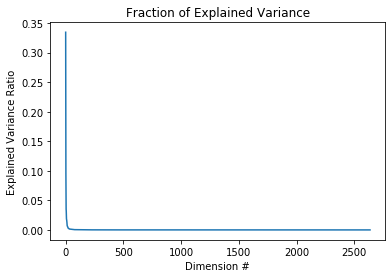

In [28]:
ax = plot_scaled_variance(pca)

In [25]:
print(np.where(np.cumsum(pca.explained_variance_ratio_)>0.9)[0][0]) #42 features explains more than 90% variance 
print(np.where(np.cumsum(pca.explained_variance_ratio_)>0.95)[0][0])

41
166


In [26]:
pca42 = PCA(copy=True, n_components=42)
pca42.fit(X_train_reshaped)
X_train_reduced=pca42.transform(X_train_reshaped)

In [30]:
X_test_reshaped = X_test.reshape((X_test.shape[0],-1))
X_test_reduced=pca42.transform(X_test_reshaped)

In [38]:
# saving the pca reduced data 
#np.save('X_train_reduced.npy', X_train_reduced)
#np.save('X_test_reduced.npy', X_test_reduced)

In [34]:
# to read the file 
#pca_data=np.load('X_train_reduced.npy')